<a href="https://colab.research.google.com/github/longsstories/vietnam-traffic-signs-recognition-YOLOv5/blob/main/Traffic_signs_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Traffic_signs_reconition_YOLOv5

/content/drive/MyDrive/Traffic_signs_reconition_YOLOv5


In [ ]:
!unzip -q /content/drive/MyDrive/Traffic_signs_reconition_YOLOv5/data_traffic-signs.zip -d /content/drive/MyDrive/Traffic_signs_reconition_YOLOv5

### Clone mô hình YOLOv5 về Drive

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.11.0+cu113 (Tesla T4)


## Kiến trúc mô hình YOLOv5

*   Backbone: New CSP-Darknet53
*   Neck: SPPF, New CSP-PAN
*   Head: YOLOv3 Head


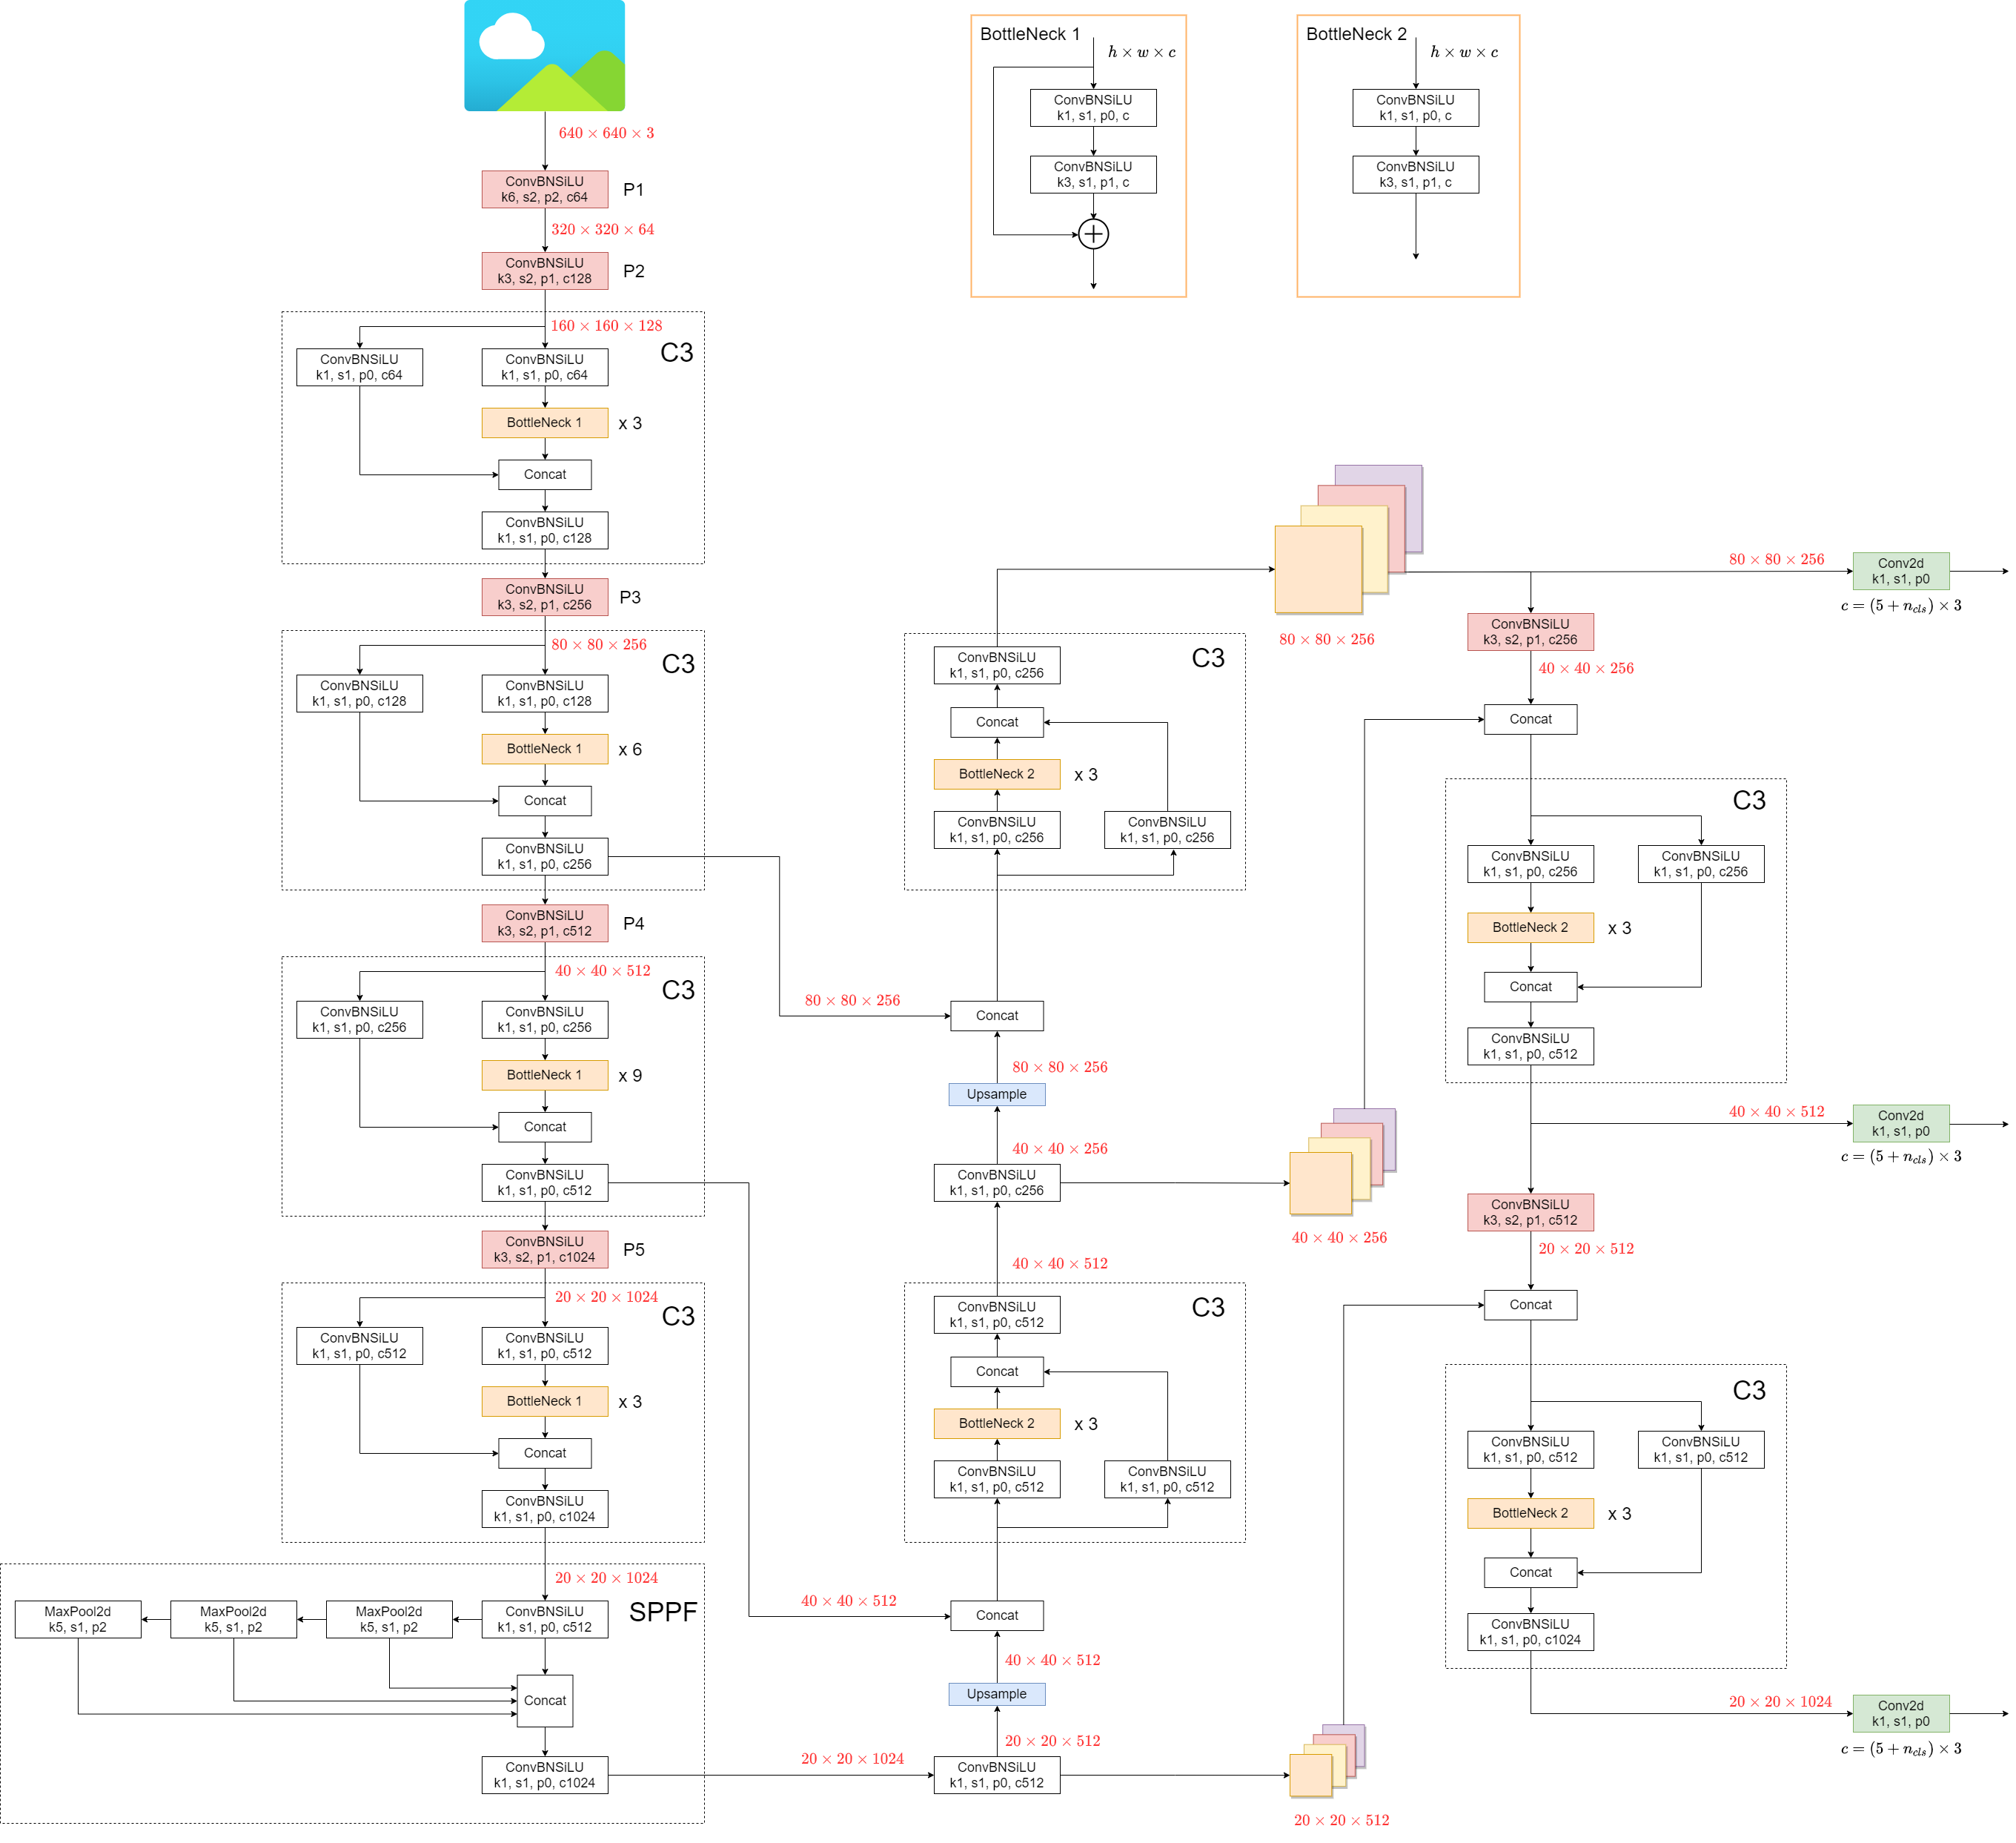

## Backbone: Fearture extraction, C3(CSPDarkNet53) — Cross-Stage Partial Networks

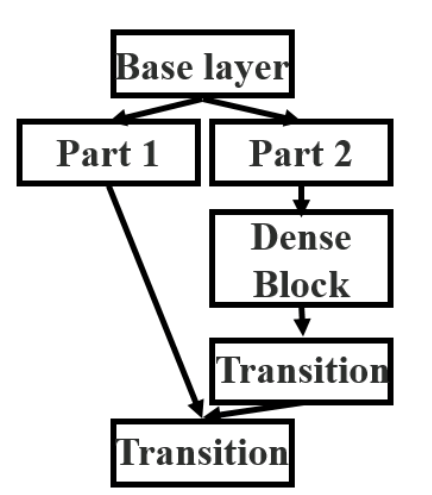

Việc sử dụng chiến lược tách và hợp nhất cho phép nhiều dòng chảy gradient hơn qua mạng. CSP connection giúp cho vừa lưu giữ được một phần thông tin từ các layer trước, vừa giảm độ phức tạp của mô hình.

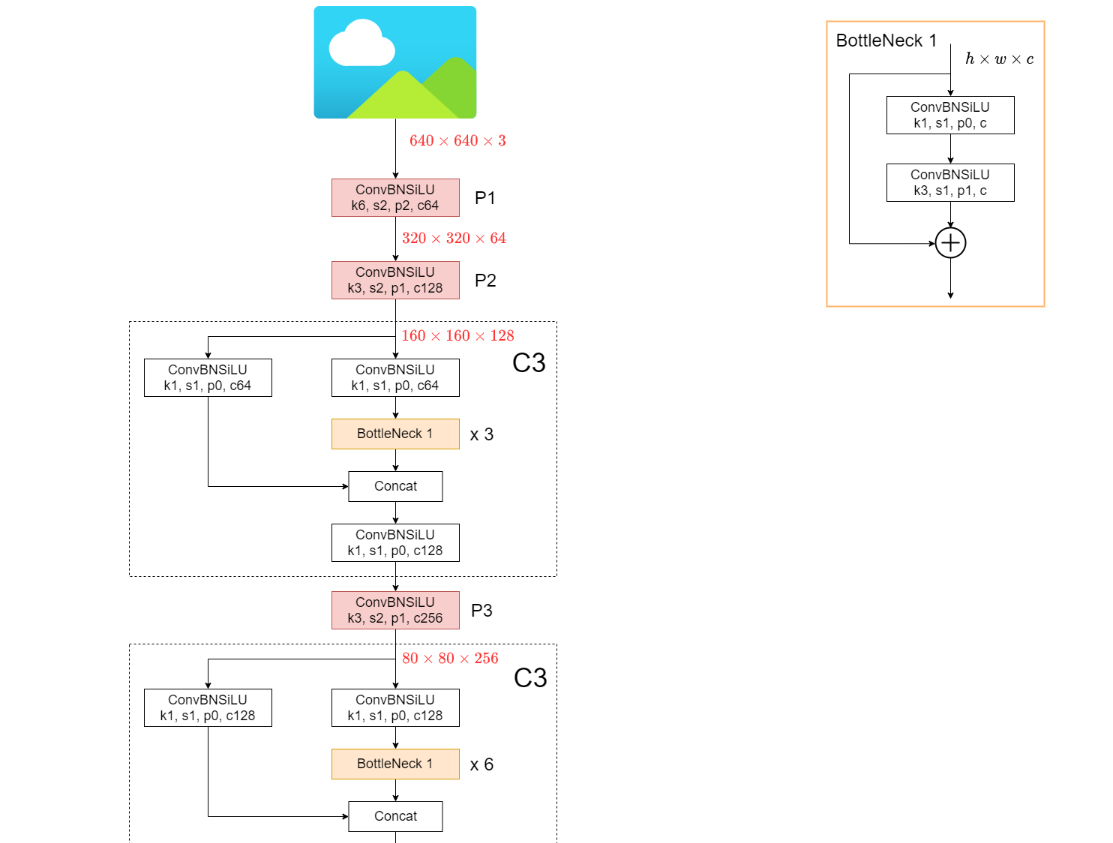

BN: Batch Nomalization chuẩn hóa lại dữ liệu sau khi nó đã đi qua một hoặc nhiều layers.

SiLU: Sigmoid Linear Unit hàm kích hoạt, SiLu(x)=x.sigmoid(x)

papers:
https://paperswithcode.com/method/silu

https://arxiv.org/pdf/1502.03167.pdf

### Neck : tạo ra các Feature Pyramid Network (FPN)
Các Feature Pyramid giúp các mô hình khái quát tốt về tỷ lệ đối tượng. Nó giúp xác định cùng một đối tượng với các kích thước và tỷ lệ khác nhau.
# SPPF : Spatial Pyramid Pooling - Fast (SPPF) layer
SPP cho phép ảnh đầu vào có thể có kích thước bất kì 

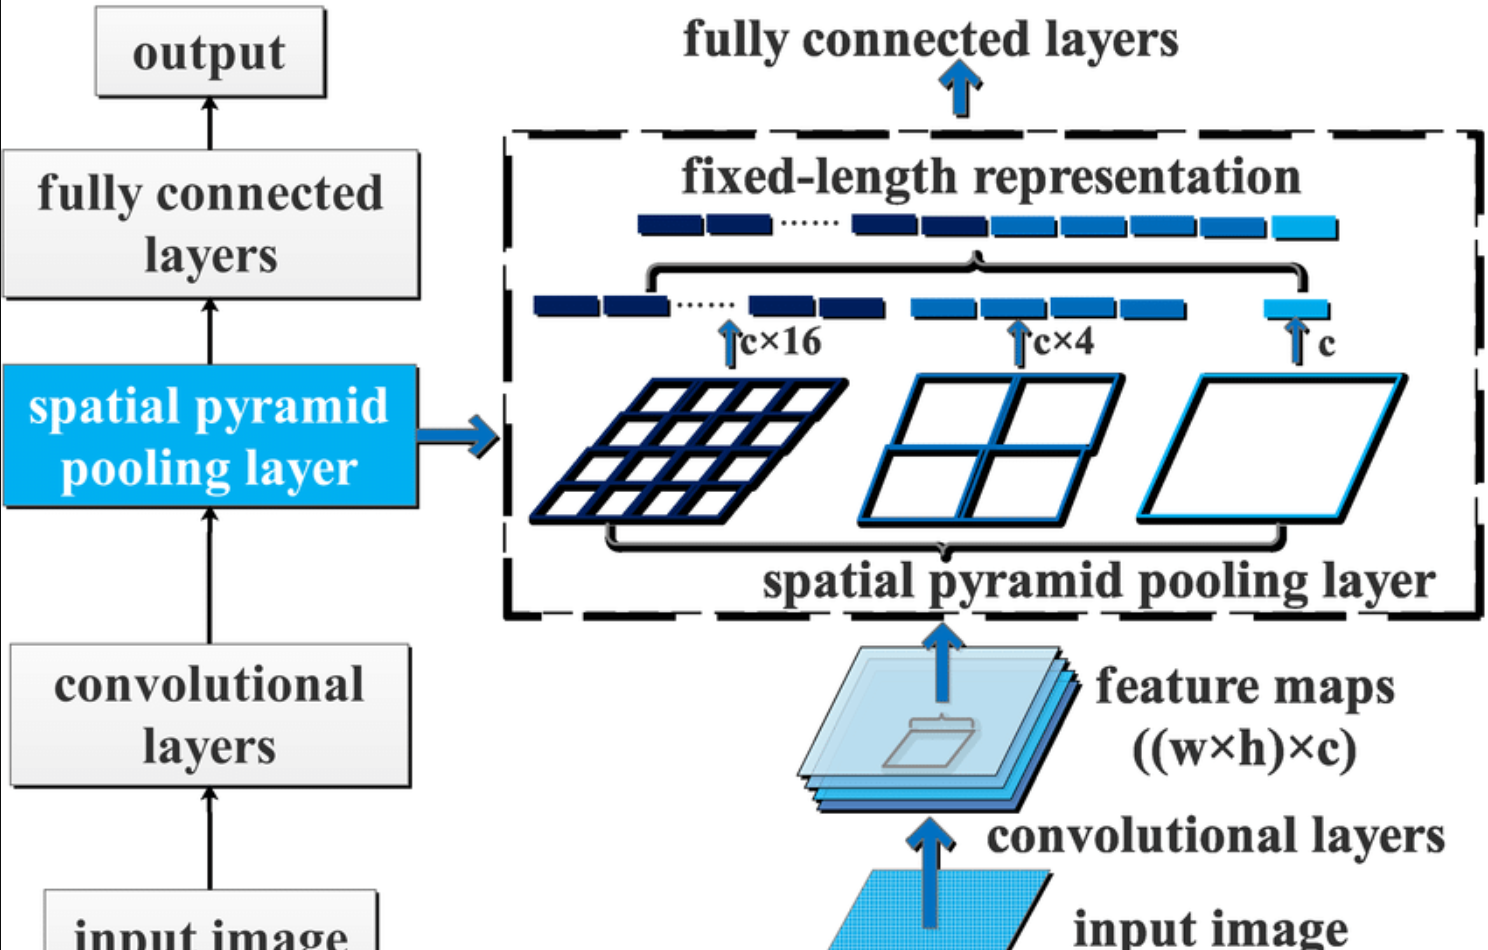



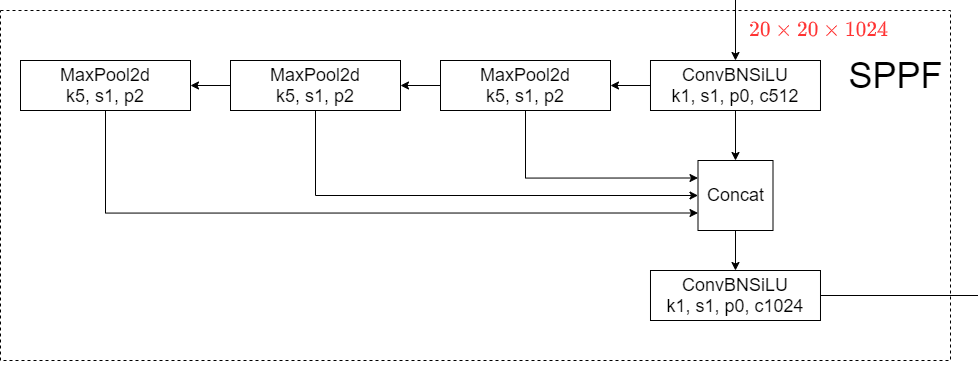

https://arxiv.org/pdf/1406.4729.pdf

### Head : thường được dùng để tạo ra các anchor boxes trên các đặc trưng và tạo ra các vectors đầu ra với xác suất lớp và bouding boxes

### Tổng quan về giữ liệu

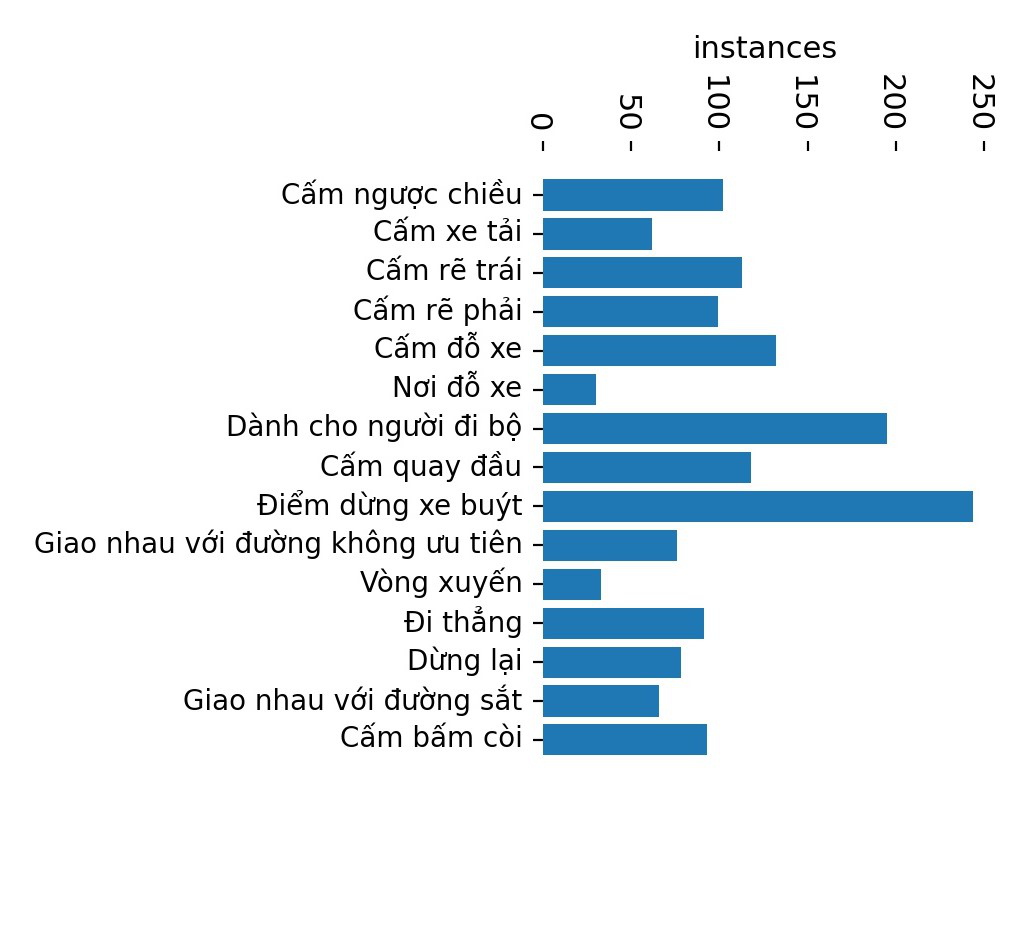

In [ ]:
from PIL import Image
Image.open('/content/drive/MyDrive/YOLO/labels.jpg')

### Train mô hình

File data_info.yaml sẽ gồm đường dẫn đến thư mục chứa ảnh và tên của các lớp như hình bên dưới.
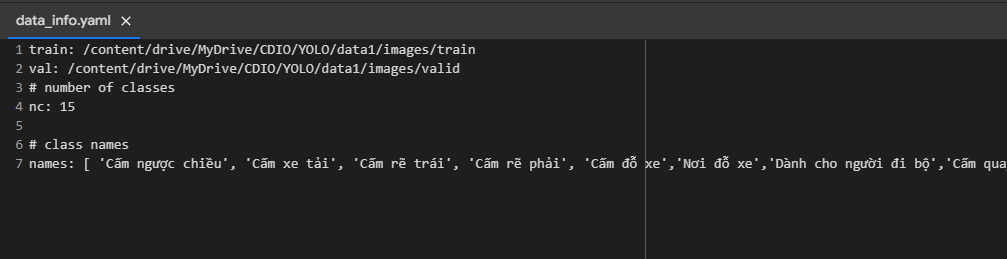

Các thông tin cần lưu ý khi train:

*   **/content/drive/MyDrive/CDIO/YOLO/yolov5/train.py** : đường dẫn đến file train.py của YOLOv5 mà ta đã clone trước đó.
*  --img: chỉnh size của ảnh 

*  --batch : batch-size


*  --epochs : số epoch train ( ở bài này chúng em chọn train 50 epochs)

*  --data : đường dẫn đến file thông tin để mô hình có thể đọc được data đã chuẩn bị (/content/drive/MyDrive/CDIO/data_info.yaml)
*  --weights : khởi tạo trọng số ban đầu là yolov5s.pt









In [ ]:
# Train YOLOv5s on COCO128 for 3 epochs
!python /content/drive/MyDrive/Traffic_signs_reconition_YOLOv5/yolov5/train.py --img 640 --batch 3 --epochs 50 --data /content/drive/MyDrive/Traffic_signs_reconition_YOLOv5/data_info.yaml --weights /content/drive/MyDrive/Traffic_signs_reconition_YOLOv5/yolov5/runs/train/exp3/weights/best.pt --cache

train: weights=/content/drive/MyDrive/Traffic_signs_reconition_YOLOv5/yolov5/runs/train/exp3/weights/best.pt, cfg=, data=/content/drive/MyDrive/Traffic_signs_reconition_YOLOv5/data_info.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=3, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-251-gc23a441 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, w

### **Chú ý** : Thông số train được sẽ được lưu vào đường dẫn 
### yolov5/runs/train/exp5 

### Trực quan hoá mô hình

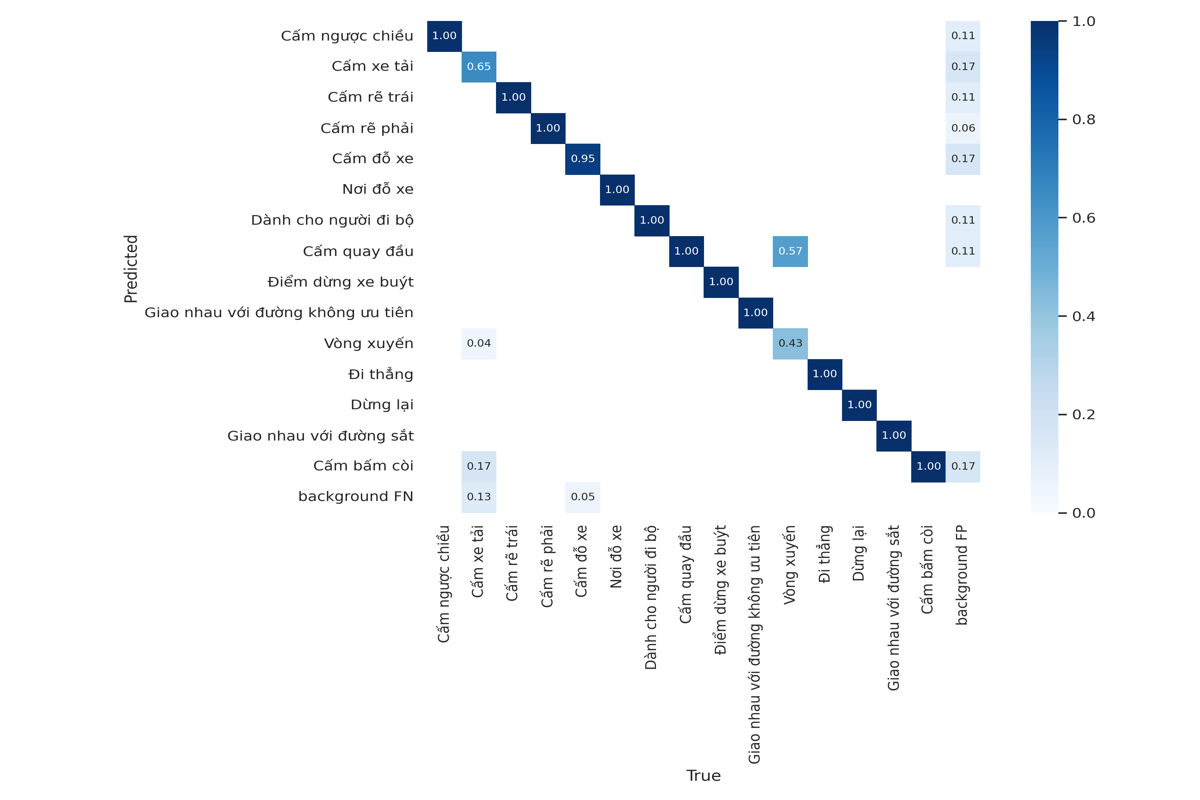

In [ ]:
from PIL import Image
im=Image.open('/content/drive/MyDrive/CDIO/YOLO/yolov5/runs/train/exp5/confusion_matrix.png')
im.resize((1200,800))

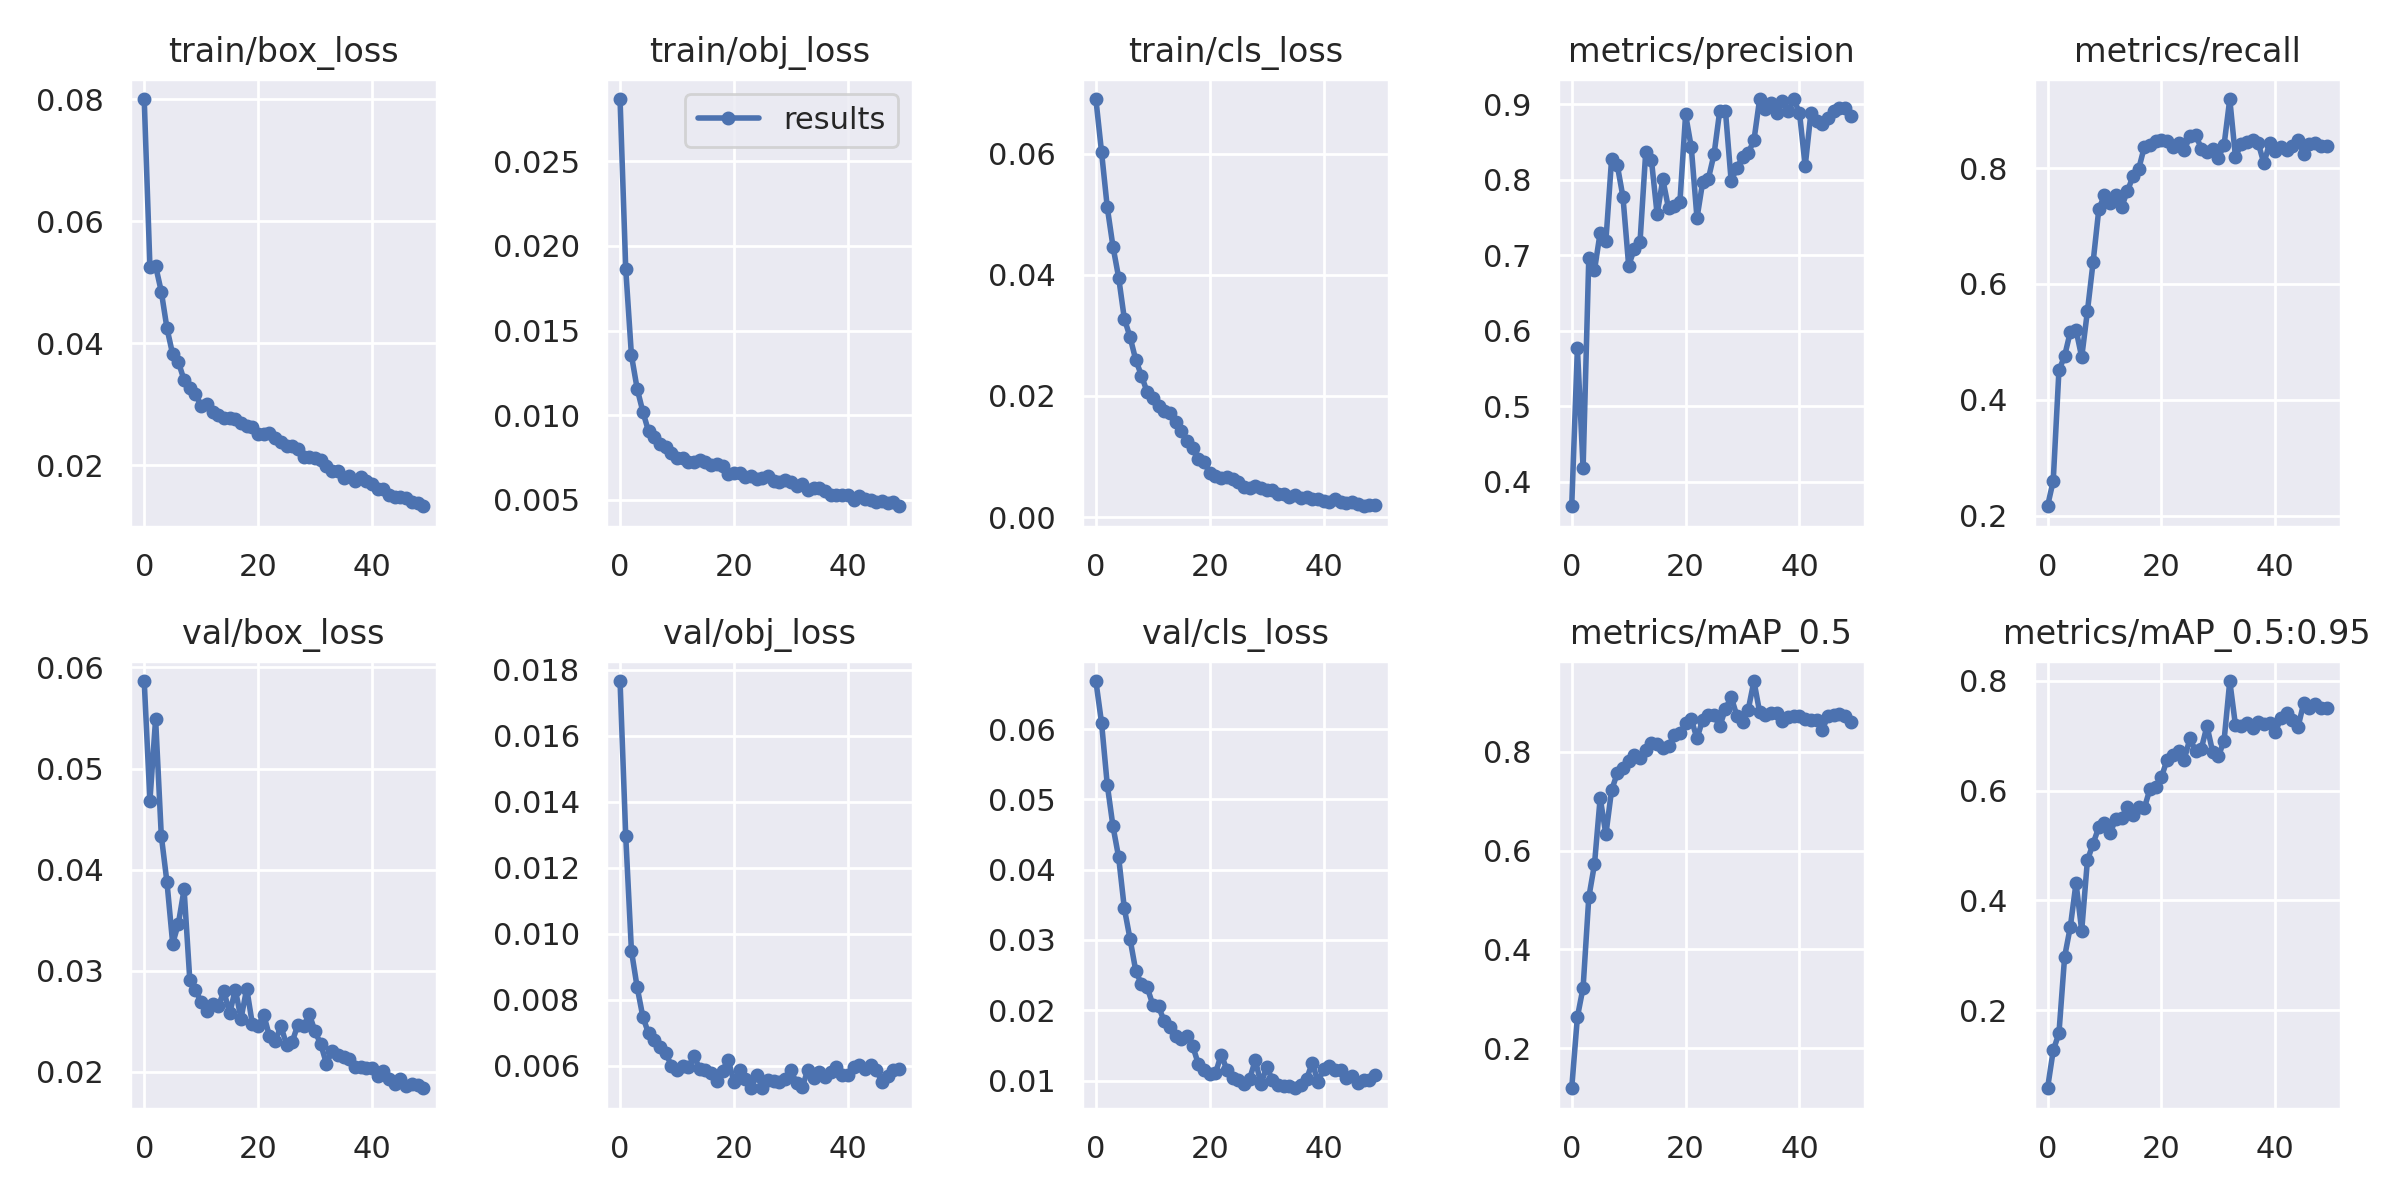

### Dự đoán

* /content/drive/MyDrive/CDIO/YOLO/yolov5/detect.py : đường dẫn đến file dectect.py của YOLOv5 để nhận diện
* --weights: đường dẫn đến mô hình chúng ta đã train (YOLOv5 sẽ lưu lại 2 file best.pt và last.pt tương ứng với mô hình train tốt nhất và cuối cùng)
* --conf: độ tin cậy
* --source: đường dẫn đến thư mục ảnh cần nhận diện

In [ ]:
!python /content/drive/MyDrive/Traffic_signs_reconition_YOLOv5/yolov5/detect.py --weights /content/drive/MyDrive/Traffic_signs_reconition_YOLOv5/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source /content/drive/MyDrive/Traffic_signs_reconition_YOLOv5/test

detect: weights=['/content/drive/MyDrive/Traffic_signs_reconition_YOLOv5/yolov5/runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/Traffic_signs_reconition_YOLOv5/test, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-251-gc23a441 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7050580 parameters, 0 gradients
image 1/32 /content/drive/MyDrive/Traffic_signs_reconition_YOLOv5/test/111.jpg: 384x640 1 Điểm dừng xe buýt, Done. (0.017s)
image 2/32 /content/drive/MyDrive/Traffic_signs_reconition_YOLOv5/test/12231.png: 256x640 1 Cấm ngược chiều, 1 Dành cho người đi bộ, 

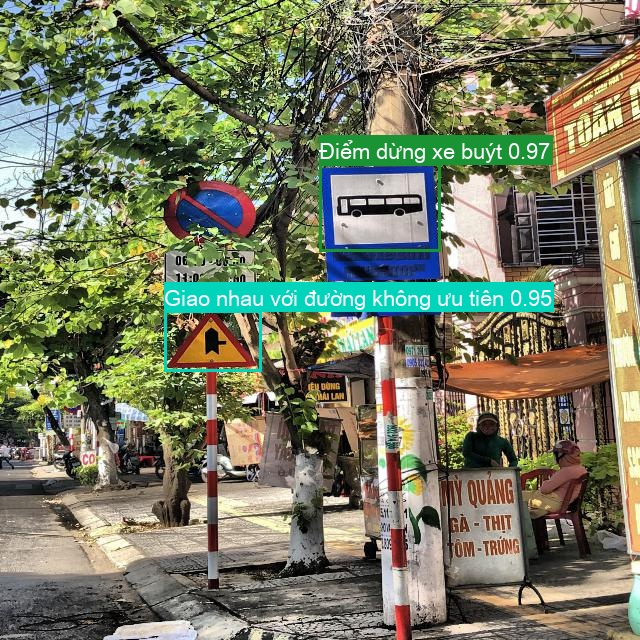

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/CDIO/YOLO/yolov5/runs/detect/exp5/10-10_jpg.rf.55aa348b9513ef2b6a151da068bd70bb.jpg')

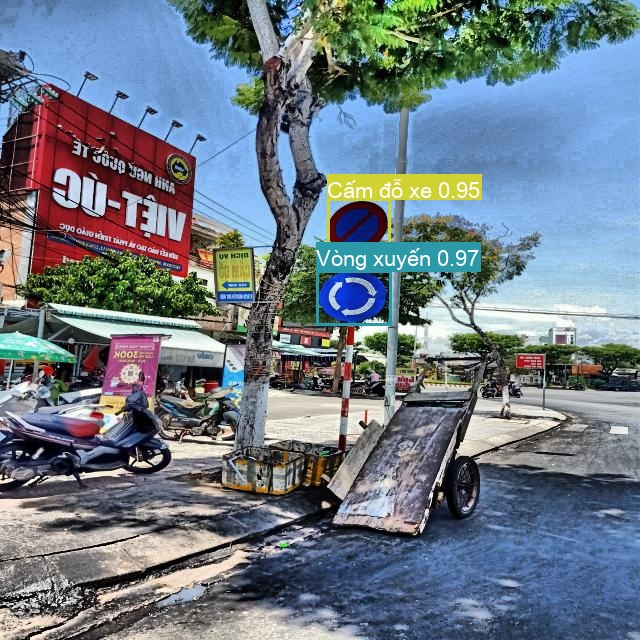

In [ ]:
Image(filename='/content/drive/MyDrive/CDIO/YOLO/yolov5/runs/detect/exp6/11-7_jpg.rf.ae4d80a0489bbd7c0c2e30321582c526.jpg')